In [651]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [652]:
df = pd.read_csv("C:\\Users\\shubh\\Downloads\\archive (17)\\train.csv", parse_dates=['Ship Date', 'Order Date'])

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [654]:
df.shape

(9800, 18)

In [655]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<AxesSubplot:>

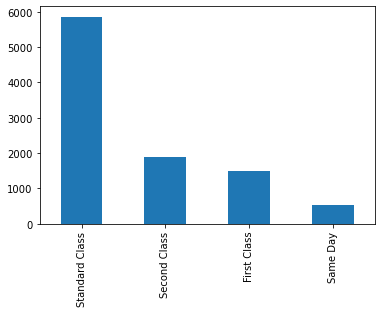

In [656]:
df['Ship Mode'].value_counts().plot(kind='bar')

In [657]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [658]:
top5 = df['City'].value_counts()

<BarContainer object of 9800 artists>

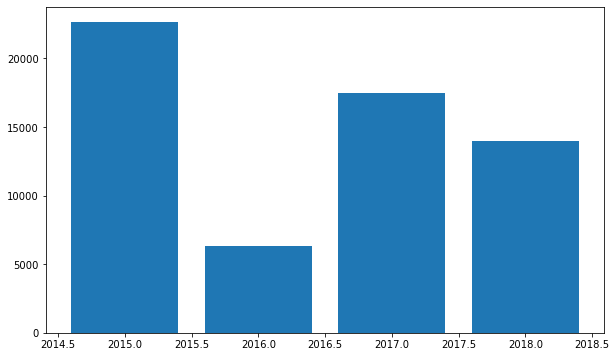

In [659]:
fig = plt.figure(figsize=(10,6))
plt.bar(df['Order Date'].dt.year, df['Sales'])

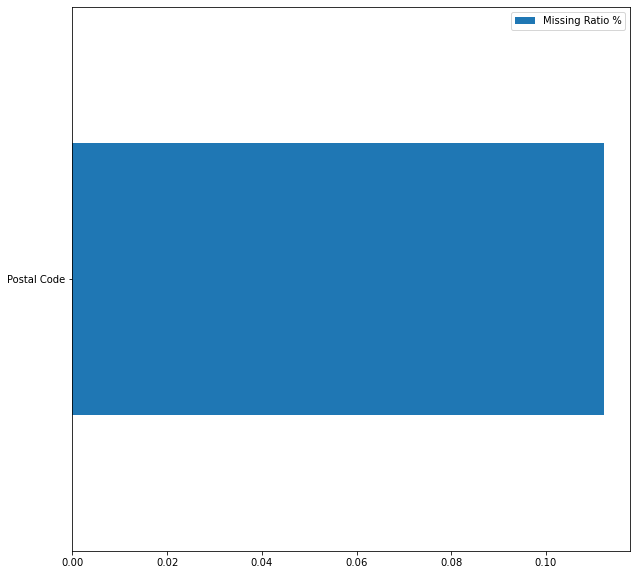

In [660]:
def plot_nas(bull: pd.DataFrame):
   
    if bull.isnull().sum().sum() != 0:
        na_df = (bull.isnull().sum() / len(bull)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
       
        missing_data.plot(kind = "barh",figsize=(10,10))
       
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [661]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [662]:
df.drop("Row ID", inplace = True, axis=1)

In [663]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [664]:
import warnings
warnings.filterwarnings('ignore')

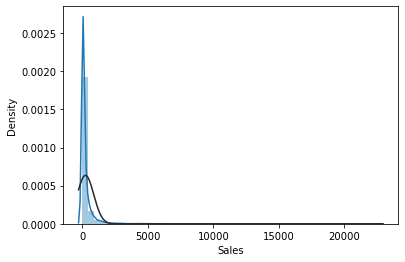

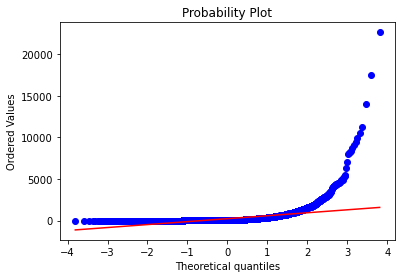

In [665]:
sns.distplot(df['Sales'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['Sales'], plot=plt)

In [666]:
df.dropna(inplace = True)

In [667]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [668]:
df.drop(['Customer Name','City', 'Product Name'] , axis = 1, inplace = True)

In [669]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Corporate,United States,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [670]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

In [671]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [672]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [673]:
df['Postal Code'].dtype

dtype('O')

In [674]:
df['Segment'].value_counts()

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64

In [675]:
df['State'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Massachusetts            135
Indiana                  135
Oregon                   122
New Jersey               122
Wisconsin                105
Maryland                 105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [676]:
df['Region'].value_counts()

West       3140
East       2774
Central    2277
South      1598
Name: Region, dtype: int64

In [677]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Ship Month'] = df['Ship Date'].dt.month
#df['Deliver Days'] = df['Ship Date'] - df['Order Date']
#df['Ship Month'] = df['Ship Date'].dt.month
#df['Order Day'] = df['Order Date'].dt.day
#df['Ship Day'] = df['Ship Date'].dt.day
df['time to deliver'] = df['Ship Month'] - df['Month']

In [678]:
#df.drop(['Deliever Days'], inplace = True, axis =1)

In [679]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Year,Month,Ship Month,time to deliver
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,8,11,3
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,8,11,3
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Corporate,United States,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,12,6,-6
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,2016,11,10,-1
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Consumer,United States,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,11,10,-1


In [680]:
df['time to deliver'].value_counts()

 0     5122
 4      806
 5      532
 2      519
 3      375
 1      350
-1      229
 6      221
-4      203
-2      202
-7      201
-6      186
-3      171
-8      170
-5      150
-9      126
-10      86
 7       83
-11      57
Name: time to deliver, dtype: int64

In [681]:
df = df[df['time to deliver'] > 0]

In [682]:
df.shape

(2886, 18)

In [683]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Year,Month,Ship Month,time to deliver
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.960,2017,8,11,3
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,United States,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.940,2017,8,11,3
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Consumer,United States,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,407.976,2017,5,10,5
21,CA-2017-137330,2017-09-12,2017-12-13,Standard Class,KB-16585,Corporate,United States,Nebraska,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,19.460,2017,9,12,3
22,CA-2017-137330,2017-09-12,2017-12-13,Standard Class,KB-16585,Corporate,United States,Nebraska,68025.0,Central,OFF-AP-10001492,Office Supplies,Appliances,60.340,2017,9,12,3


In [684]:
from sklearn.preprocessing import OrdinalEncoder

In [685]:
df.drop('Country', inplace = True, axis = 1)

In [686]:
ordinal_encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1 )

In [687]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 9768
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         2886 non-null   object        
 1   Order Date       2886 non-null   datetime64[ns]
 2   Ship Date        2886 non-null   datetime64[ns]
 3   Ship Mode        2886 non-null   object        
 4   Customer ID      2886 non-null   object        
 5   Segment          2886 non-null   object        
 6   State            2886 non-null   object        
 7   Postal Code      2886 non-null   object        
 8   Region           2886 non-null   object        
 9   Product ID       2886 non-null   object        
 10  Category         2886 non-null   object        
 11  Sub-Category     2886 non-null   object        
 12  Sales            2886 non-null   float64       
 13  Year             2886 non-null   int64         
 14  Month            2886 non-null   int64  

In [689]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [690]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [691]:
X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])

In [692]:
X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

In [693]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [694]:
#X_train1 = pd.DataFrame(X_train)

In [695]:
#X_train1.corr()

In [696]:
# for label, content in X_train.items():
#     if pd.api.types.is_string_dtype(content):
#         X_train[label] = content.astype("category").cat.as_ordered()
        
# for label, content in X_test.items():
#     if pd.api.types.is_string_dtype(content):
#         X_test[label] = content.astype("category").cat.as_ordered()

In [697]:
X_train.shape

(2308, 16)

In [698]:
X.shape

(2886, 16)

In [699]:
X_test.shape

(578, 16)

In [700]:
corr = X_train.corr()

In [701]:
mask = np.triu(corr)

<AxesSubplot:>

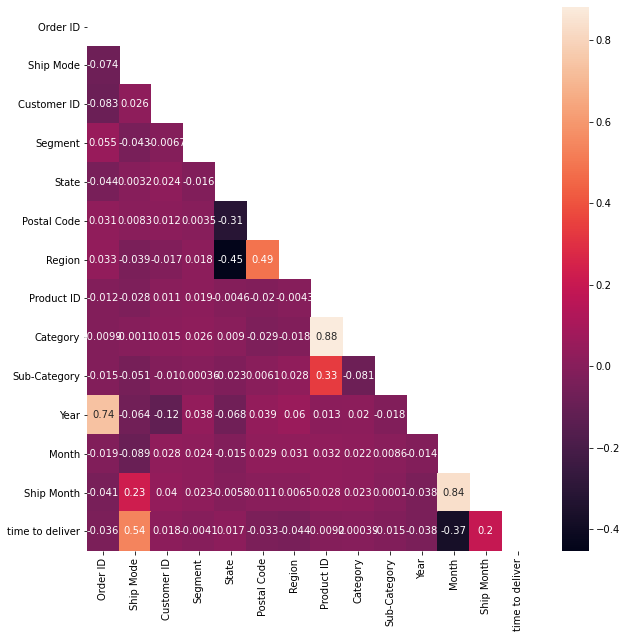

In [702]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, annot = True)

In [703]:
X_train.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,State,Postal Code,Region,Product ID,Category,Sub-Category,Year,Month,Ship Month,time to deliver
9728,1075.0,2018-02-12,2018-04-12,0.0,356.0,0.0,19.0,3.0,1.0,1013.0,1.0,15.0,2018,2,4,2
1404,1100.0,2015-06-04,2015-08-04,0.0,547.0,2.0,34.0,48.0,1.0,1025.0,1.0,15.0,2015,6,8,2
8746,872.0,2018-02-02,2018-07-02,3.0,76.0,1.0,3.0,333.0,3.0,114.0,0.0,9.0,2018,2,7,5
443,502.0,2017-05-09,2017-07-09,2.0,479.0,0.0,20.0,162.0,0.0,821.0,1.0,12.0,2017,5,7,2
4104,1272.0,2018-07-08,2018-08-13,3.0,306.0,0.0,3.0,333.0,3.0,1183.0,2.0,13.0,2018,7,8,1


In [704]:
time_cols_train = X_train[['Order Date', 'Ship Date']]
time_cols_test = X_test[['Order Date', 'Ship Date']]




# time_cols_train
# time_cols_test

In [705]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 9728 to 3907
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         2308 non-null   float64       
 1   Order Date       2308 non-null   datetime64[ns]
 2   Ship Date        2308 non-null   datetime64[ns]
 3   Ship Mode        2308 non-null   float64       
 4   Customer ID      2308 non-null   float64       
 5   Segment          2308 non-null   float64       
 6   State            2308 non-null   float64       
 7   Postal Code      2308 non-null   float64       
 8   Region           2308 non-null   float64       
 9   Product ID       2308 non-null   float64       
 10  Category         2308 non-null   float64       
 11  Sub-Category     2308 non-null   float64       
 12  Year             2308 non-null   int64         
 13  Month            2308 non-null   int64         
 14  Ship Month       2308 non-null   int6

In [706]:
X_train.drop(columns=time_cols_train.columns, inplace=True, axis =1)
X_test.drop(columns=time_cols_test.columns, inplace=True, axis=1)

In [707]:
X_train = X_train.values
X_test = X_test.values

In [723]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [724]:
#X_train_new = pd.concat((pd.DataFrame(X_train), time_cols_train), axis=1, ignore_index = True)

In [725]:
#X_train_new.head()

In [726]:
X_train.shape

(2308, 14)

In [727]:
# y_test = y_test.values
# #y_test = y_test.reshape(-1,1)
# y_train = y_train.values
# #y_train = y_train.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [728]:
# models = {"RFF": RandomForestRegressor(n_estimators = 10, random_state = 0),
#           "XGB": XGBRegressor()
#          }

# # Create a function to fit and score models
# def fit_and_score(models, X_train, X_test, y_train, y_test):
#     """
#     Fits and evaluates given machine learning models.
#     models : a dict of differetn Scikit-Learn machine learning models
#     X_train : training data (no labels)
#     X_test : testing data (no labels)
#     y_train : training labels
#     y_test : test labels
#     """
#     # Set random seed
#     np.random.seed(42)
#     # Make a dictionary to keep model scores
#     model_scores = {}
#     # Loop through models
#     for name, model in models.items():
#         # Fit the model to the data
#         model.fit(X_train, y_train)
#         # Evaluate the model and append its score to model_scores
#         model_scores[name] = model.score(X_test, y_test)
#     return model_scores

In [729]:
# model_scores = fit_and_score(models=models,
#                              X_train=X_train,
#                              X_test=X_test,
#                              y_train=y_train.ravel(),
#                              y_test=y_test.ravel())

# model_scores

In [730]:
y_test.shape

(578,)

In [731]:
type(y_test), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [732]:
from xgboost import XGBRegressor
import math
from sklearn.metrics import mean_squared_error

model = XGBRegressor(learning_rate=0.03, max_depth=1,)
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse_xgb = math.sqrt(mean_squared_error(y_test, preds))

print("Root Mean Squared Error for XGBoost:", rmse_xgb)

Root Mean Squared Error for XGBoost: 398.5544056377938


In [733]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [734]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [735]:
pred1 = rf.predict(X_test)

In [736]:
rmse_rf = math.sqrt(mean_squared_error(y_test, pred1))

In [737]:
rmse_rf

522.5372379101138